In [46]:
# Установка библиотеки PyTorch.
!pip3 install torch


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import torch
print(torch.__version__)

2.6.0+cu126


In [48]:
# Ряд вспомогательных функций для проверки заданий.

def custom_compare(x, y):
    if str(x) != str(y):
        raise RuntimeError(f'Ожидаемое значение: {y}. Фактическое: {x}')
        
def to_list(x, precision=2):
    return [round(x, precision) for x in x.tolist()]

def to_list_m(m, precision=2):
    res = []
    
    for l in m.tolist():
        res.append([round(x, precision) for x in l])
        
    return res

# Вектора и матрицы в PyTorch

In [49]:

def function_1_solution(x):
    """
    Принимает на вход вектор численных значений и вычисляет на его основе единственное значение.
    
    Аргументы:
        x: Вектор, который имеет тип torch.Tensor.
        
    Возвращаемое значение:
        Вектор (torch.Tensor), состоящий из одного числа — значения, которое
        является результатом выполнения описанного вычисления.
    """
    return ((x.sin() - x.cos())/(x**2+1)).sum()

In [50]:
def function_1_test():
    vect_example_1 = torch.tensor([0, 1], dtype=torch.float)
    res_example_1 = -0.85
    
    custom_compare(round(function_1_solution(vect_example_1).item(), 2), res_example_1)
    
    vect_example_2 = torch.tensor([0, 3.14159], dtype=torch.float)
    res_example_2 = -0.91
    
    custom_compare(round(function_1_solution(vect_example_2).item(), 2), res_example_2)
    
    vect_example_3 = torch.tensor([6, 2, 3, 1.1], dtype=torch.float)
    res_example_3 = 0.54
    
    custom_compare(round(function_1_solution(vect_example_3).item(), 2), res_example_3)

    print('Тест прошёл успешно!')

In [51]:
function_1_test()

Тест прошёл успешно!


In [52]:
def function_2_solution(x, y):
    """
    Принимает на вход два вектора численных значений и вычисляет на их основе новый вектор.
    
    Аргументы:
        x: Вектор, который имеет тип torch.Tensor.
        y: Вектор, который имеет тип torch.Tensor.
        
    Возвращаемое значение:
        Вектор (torch.Tensor), полученный из исходных векторов по заданному правилу.
    """
    return torch.cat((x/y.sum(),y/x.sum()),0)

In [53]:
def function_2_test():
    x_example_1 = torch.tensor([1, 2, 3], dtype=torch.float)
    y_example_1 = torch.tensor([1, 1, 1], dtype=torch.float)
    
    res_example_1 = [0.33, 0.67, 1.0, 0.17, 0.17, 0.17]
    
    custom_compare(to_list(function_2_solution(x_example_1, y_example_1)),
                   res_example_1)
    
    x_example_2 = torch.tensor([2, 1, 9, 34], dtype=torch.float)
    y_example_2 = torch.tensor([22, 17, -1], dtype=torch.float)
    
    res_example_2 = [0.05, 0.03, 0.24, 0.89, 0.48, 0.37, -0.02]
    
    custom_compare(to_list(function_2_solution(x_example_2, y_example_2)),
                   res_example_2)
    
    print('Тест прошёл успешно!')

In [54]:
function_2_test()

Тест прошёл успешно!


In [55]:
def function_3_solution(x, y):
    """
    Принимает на вход два вектора численных значений и вычисляет
    на их основе матрицу по заданному правилу.
    
    Аргументы:
        x: Вектор, который имеет тип torch.Tensor.
        y: Вектор, который имеет тип torch.Tensor.
        
    Возвращаемое значение:
        Матрица (torch.Tensor), полученная из исходных векторов по заданному правилу.
    """
    return torch.mm(torch.log(x).reshape(-1,1),(y**2).reshape((1,-1)))

In [56]:
def function_3_test():
    x_example_1 = torch.tensor([1, 2.71828], dtype=torch.float)
    y_example_1 = torch.tensor([2, 3, 4], dtype=torch.float)
    
    res_example_1 = [[0.0, 0.0, 0.0],
                     [4.0, 9.0, 16.0]]
    
    custom_compare(to_list_m(function_3_solution(x_example_1, y_example_1)),
                   res_example_1)
    
    x_example_2 = torch.tensor([72, 7.2, 2.8, 5.6], dtype=torch.float)
    y_example_2 = torch.tensor([11, 32, 4.1, -8, 1.7, 3.2, -4.9], dtype=torch.float)
    
    res_example_2 = [[517.48, 4379.31, 71.89, 273.71, 12.36, 43.79, 102.68],
                     [238.86, 2021.46, 33.18, 126.34, 5.71, 20.21, 47.4],
                     [124.58, 1054.33, 17.31, 65.9, 2.98, 10.54, 24.72],
                     [208.45, 1764.11, 28.96, 110.26, 4.98, 17.64, 41.36]]
    
    custom_compare(to_list_m(function_3_solution(x_example_2, y_example_2)),
                   res_example_2)
    
    print('Тест прошёл успешно!')

In [57]:
function_3_test()

Тест прошёл успешно!


# Функции потерь и функции активации

In [58]:
def mae_solution(y, y_pred):
    """
    Принимает на вход вектор фактических значений предсказываемой характеристики,
    вектор предсказанных значений характеристики и вычисляет на их основе значение MAE.
    
    Аргументы:
        y: Вектор фактических значений предсказываемой характеристики. Имеет тип данных torch.Tensor.
        y_pred: Вектор предсказанных моделью значений характеристики. Имеет тип данных torch.Tensor.
                Предсказание, которое содержится на i-й позиции вектора y_pred соответствует
                фактическому значению на i-й позиции вектора y.
        
    Возвращаемое значение:
        Вектор (torch.Tensor), состоящий из одного числа — значения
        MAE для представленных данных.
    """
    return 1/len(y_pred)*torch.abs(y_pred-y).sum()

In [59]:
def mae_test():
    y_example_1 = torch.tensor([1, -1, 1, 1], dtype=torch.float)
    y_pred_example_1 = torch.tensor([1, -1, -1, -1], dtype=torch.float)
    
    res_example_1 = 1.0
    
    custom_compare(round(mae_solution(y_example_1, y_pred_example_1).item(), 2),
                   res_example_1)
    
    y_example_2 = torch.tensor([10, 20, -31, 4, -5, 7, -9], dtype=torch.float)
    y_pred_example_2 = torch.tensor([3, 25, -35, 0, 10, 7, -5], dtype=torch.float)
    
    res_example_2 = 5.57
    
    custom_compare(round(mae_solution(y_example_2, y_pred_example_2).item(), 2),
                   res_example_2)

    print('Тест прошёл успешно!')

In [60]:
mae_test()

Тест прошёл успешно!


In [61]:
def mae_general_solution(y,y_pred):
    """
    Принимает на вход набор векторов, которые необходимо предсказать для объектов из выборки,
    набор векторов, которые были предсказаны для объектов из выборки,
    и вычисляет на их основе значение MAE.
    
    Аргументы:
        y: Набор векторов, которые необходимо предсказать для объектов из выборки.
           Набор представляется в виде матрицы (torch.Tensor) размера d x k,
           где d — количество объектов в выборке, а k — размер вектора,
           который необходимо предсказать для каждого объекта.
        y_pred: Набор векторов, которые были предсказаны для объектов из выборки.
                Набор представляется в виде матрицы (torch.Tensor) размера d x k,
                где d — количество объектов в выборке, а k — размер вектора,
                который необходимо предсказать для каждого объекта.
        
    Возвращаемое значение:
        Вектор (torch.Tensor), состоящий из одного числа — значения
        MAE для представленных данных.
    """

    return 1/(y_pred.size()[0]*y_pred.size()[1])*(torch.abs(y-y_pred)).sum()

In [62]:
def mae_general_test():
    y_example_1 = torch.tensor([[1, -1], [1, 1]], dtype=torch.float)
    y_pred_example_1 = torch.tensor([[1, -1], [-1, -1]], dtype=torch.float)
    
    res_example_1 = 1.0
    
    custom_compare(round(mae_general_solution(y_example_1, y_pred_example_1).item(), 2),
                   res_example_1)
    
    y_example_2 = torch.tensor([[10, 22, -3], [11, 28, 0], [1, -1, 11], [22, 39, -7]], dtype=torch.float)
    y_pred_example_2 = torch.tensor([[11, 20, 5], [5, 30, -2], [1, -1, 0], [18, 30, -7]], dtype=torch.float)
    
    res_example_2 = 3.75
    
    custom_compare(round(mae_general_solution(y_example_2, y_pred_example_2).item(), 2),
                   res_example_2)

    print('Тест прошёл успешно!')

In [63]:
mae_general_test()

Тест прошёл успешно!


In [64]:
def softmax_solution(y):
    """
    Принимает на вход вектор численных значений и производит
    над ним преобразование согласно логике работы функции Softmax.
    
    Аргументы:
        y: Вектор численных значений. Имеет тип данных `torch.Tensor`.
        
    Возвращаемое значение:
        Вектор (`torch.Tensor`) вероятностей.
    """
    
    return y.exp()/(y.exp()).sum()

In [65]:
def softmax_test():
    y_example_1 = torch.tensor([1, 2, 3], dtype=torch.float)
    
    res_example_1 = [0.09, 0.24, 0.67]
    
    custom_compare(to_list(softmax_solution(y_example_1)),
                   res_example_1)
    
    y_example_2 = torch.tensor([-1, 20, 19, -100, 2, 0], dtype=torch.float)
    
    res_example_2 = [0.0, 0.73, 0.27, 0.0, 0.0, 0.0]
    
    custom_compare(to_list(softmax_solution(y_example_2)),
                   res_example_2)
    
    print('Тест прошёл успешно!')

In [66]:
softmax_test()

Тест прошёл успешно!


# Обучение нейронной сети

In [67]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_iris()
X = torch.tensor(data["data"])
y = torch.tensor(data["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [69]:
from collections import OrderedDict

# TODO: Реализуйте модель нейронной сети и поместите её в эту переменную.
#       В качестве функции активации на последнем слое выберите torch.nn.LogSoftmax.
model = torch.nn.Sequential(
    torch.nn.Linear(4,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,3),
    torch.nn.LogSoftmax(dim=1),
)

# Необходимо сообщить модели, с данными какого типа она будет работать.
model = model.to(dtype=X.dtype)

In [70]:
model

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): LogSoftmax(dim=1)
)

In [71]:
m = torch.nn.LogSoftmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
print(input)
print(output)

tensor([[-0.2160,  0.1260,  1.3235],
        [-0.2477, -1.1454,  0.6939]])
tensor([[-1.9558, -1.6138, -0.4164],
        [-1.3792, -2.2769, -0.4376]])


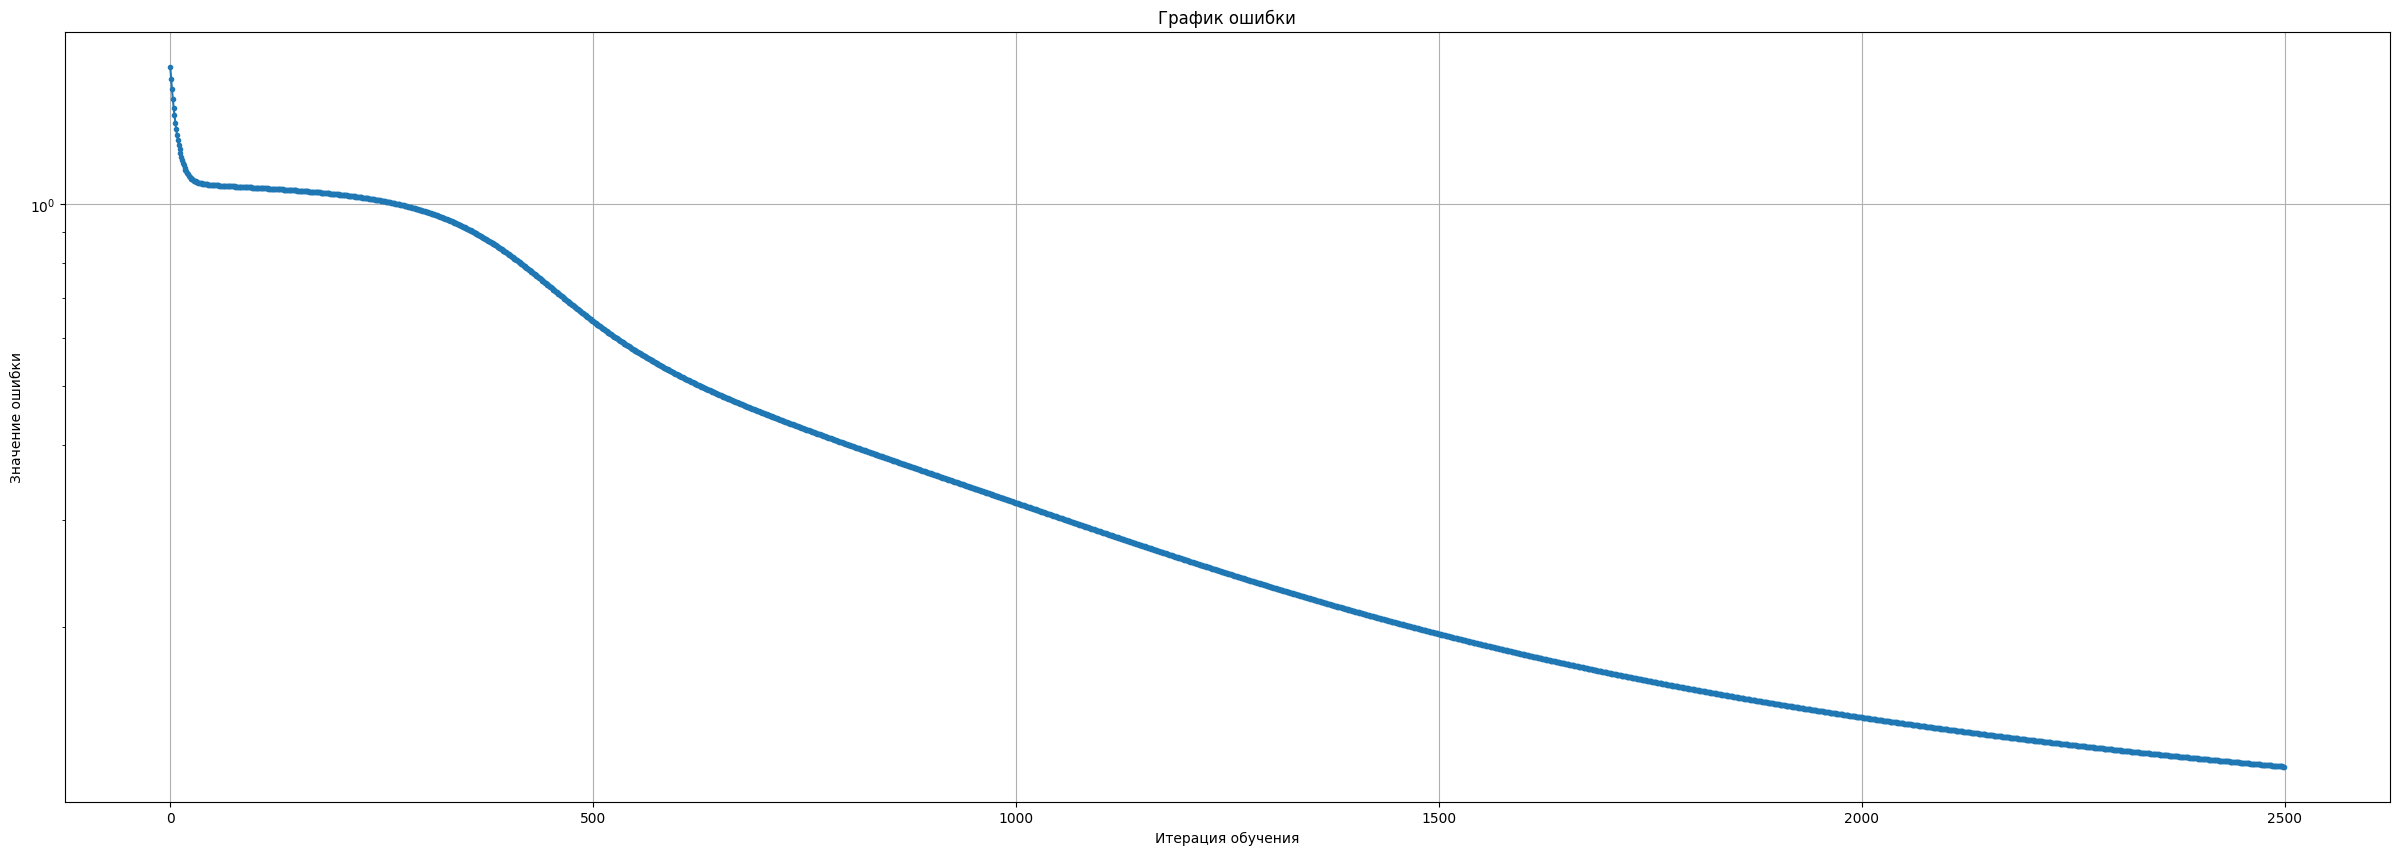

In [72]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Подберите число итераций обучения нейронной сети.
#       Значение числа итераций стоит выбрать большим 1000.
num_epochs = 2500

# TODO: Создайте оптимизатор SGD аналогично тому, как он задавался в лекции.
#       Не забудьте передать в него model.parameters().
#       В качестве величины шага обучения (параметр lr) возьмите значение 0.01.
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# TODO: Задайте функцию потерь. В нашем случае это должна быть torch.nn.NLLLoss.
loss_fn = torch.nn.NLLLoss()

losses = []

for epoch in range(1, num_epochs + 1):
    # TODO: Обнулите накопленное значение градиента с помощью фукции zero_grad объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    optimizer.zero_grad()
    
    # TODO: Посчитайте предсказание модели для объектов из матрицы X.
    pred = model(X_train)
    # TODO: Посчитайте суммарные потери для предсказанных значений из pred.
    loss = loss_fn(pred, y_train)
    
    # TODO: Рассчитайте градиенты loss по всем параметрам модели с помощью функции backward.
    #       Замените ключевое слово pass на необходимое выражение.
    
    loss.backward()

    # TODO: Произведите шаг оптимизации с помощью функции step объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

## Получение предсказания на тестовой выборке

In [73]:
# Тестовые данные, которые нужны для проверки корректности решения.
test_data = torch.tensor(
    [[6.1925, 2.8127, 4.8053, 1.8340],
     [6.3122, 3.3084, 4.6696, 1.5903],
     [6.4308, 2.7846, 5.6049, 2.0857],
     [6.1065, 2.7853, 3.9796, 1.3208],
     [5.1890, 4.1195, 1.4894, 0.1041],
     [6.4091, 2.7052, 5.3171, 1.9026],
     [5.4741, 3.5095, 1.3004, 0.1830],
     [6.7288, 3.0913, 4.7038, 1.4960],
     [5.0875, 3.5243, 1.4057, 0.3117],
     [5.3994, 3.8903, 1.7050, 0.4009],
     [5.6904, 4.3916, 1.4684, 0.3964],
     [4.9079, 3.0955, 1.4920, 0.1092],
     [7.7159, 3.8090, 6.7016, 2.2142],
     [4.8113, 3.0182, 1.3959, 0.2815],
     [6.4310, 3.2257, 5.2900, 2.3065],
     [6.9995, 3.1955, 4.7015, 1.3973],
     [5.6823, 2.9997, 4.2251, 1.2014],
     [5.5815, 2.7192, 4.1900, 1.2832],
     [5.9034, 3.1997, 4.7991, 1.8313],
     [5.7005, 2.6195, 3.4773, 0.9757],
     [4.9751, 3.5004, 1.3134, 0.2750],
     [6.0946, 2.9318, 4.6946, 1.3818],
     [5.0014, 3.2270, 1.1918, 0.2007],
     [5.8717, 3.0227, 4.2037, 1.5053],
     [5.2060, 3.4223, 1.3902, 0.2009],
     [4.3859, 3.2013, 1.3159, 0.2079],
     [7.3128, 2.8799, 6.3334, 1.8338],
     [6.7187, 3.1061, 5.5931, 2.4143],
     [6.6812, 3.0036, 4.9912, 1.7009],
     [7.1003, 2.9924, 5.8891, 2.0872],
     [4.9905, 2.2989, 3.3021, 0.9962],
     [6.2052, 3.4357, 5.4059, 2.2973],
     [4.4913, 2.2953, 1.3294, 0.3075],
     [7.9164, 3.7958, 6.4071, 1.9915],
     [4.9946, 3.5099, 1.6099, 0.6029],
     [6.9187, 3.1006, 5.4146, 2.0737],
     [6.7196, 3.1102, 4.4057, 1.3974],
     [6.3969, 2.8016, 5.5884, 2.1988],
     [5.1093, 2.5149, 3.0349, 1.0820],
     [5.0814, 3.3899, 1.5106, 0.2116],
     [5.5119, 4.2125, 1.4162, 0.2252],
     [6.5873, 2.8985, 4.6158, 1.3120],
     [6.7868, 2.7933, 4.8130, 1.4186],
     [5.7971, 2.6743, 3.8844, 1.1489],
     [6.4954, 3.1968, 5.0977, 2.0127],
     [6.3132, 2.5050, 4.8871, 1.4825],
     [4.9923, 3.3990, 1.4873, 0.1776],
     [5.8016, 2.6736, 5.1037, 1.8772],
     [6.5899, 3.0080, 4.4031, 1.4098],
     [6.7034, 3.2995, 5.6906, 2.5213],
     [5.5726, 2.5027, 3.9056, 1.1082],
     [4.6110, 3.1552, 1.4819, 0.2269],
     [5.3962, 3.7292, 1.5056, 0.1840],
     [4.6978, 3.1884, 1.2872, 0.2045],
     [7.7259, 2.6203, 6.9175, 2.2707],
     [4.9117, 3.5911, 1.3559, 0.1051],
     [5.5060, 2.4992, 3.9971, 1.2857],
     [6.0250, 2.2070, 3.9895, 0.9892],
     [6.2824, 2.7039, 4.8852, 1.7950],
     [6.5009, 2.9797, 5.4999, 1.8144],
     [5.7074, 2.7965, 4.0783, 1.3030],
     [7.1991, 3.0009, 5.7894, 1.5942],
     [5.4843, 2.3981, 3.6846, 0.9985],
     [5.9921, 2.9082, 4.4937, 1.5119],
     [5.7057, 2.8921, 4.1759, 1.3012],
     [4.9960, 3.3127, 1.3778, 0.1983],
     [7.3930, 2.8093, 6.1120, 1.9125],
     [4.8980, 3.0966, 1.5072, 0.2077],
     [5.7947, 2.6964, 4.0938, 0.9683],
     [5.5206, 2.4189, 3.8104, 1.0849],
     [6.3227, 3.3981, 5.6103, 2.4238],
     [5.3746, 3.4166, 1.5101, 0.4062],
     [7.7002, 3.0019, 6.1238, 2.3163],
     [7.6668, 2.7952, 6.6920, 2.0174],
     [5.7909, 2.7058, 5.1240, 1.8787],
     [4.8202, 3.4038, 1.9038, 0.1706],
     [4.6180, 3.3850, 1.3792, 0.2890],
     [6.0207, 3.3968, 4.4946, 1.5936],
     [6.7062, 2.5106, 5.7983, 1.7929],
     [7.1862, 3.1946, 6.0065, 1.8011],
     [6.9320, 3.1704, 5.6946, 2.3006],
     [5.0794, 3.5046, 1.3968, 0.1867],
     [5.4282, 2.9711, 4.5280, 1.5053],
     [6.2885, 2.8019, 5.0646, 1.5129],
     [6.1996, 2.9017, 4.2869, 1.3103],
     [6.9157, 3.0832, 5.0973, 2.3123],
     [5.5830, 2.7712, 4.9095, 1.9998],
     [4.5919, 3.5793, 0.9960, 0.1591],
     [6.4994, 2.9805, 5.7897, 2.1949],
     [5.6909, 3.8175, 1.7168, 0.3178],
     [4.7868, 3.0152, 1.3686, 0.0763],
     [5.7133, 2.5093, 4.9902, 1.9970],
     [5.7222, 2.7908, 4.4754, 1.2860],
     [5.8094, 2.5860, 3.9722, 1.1959],
     [6.7882, 3.0047, 5.4856, 2.0806],
     [4.9022, 3.0257, 1.3815, 0.2020],
     [6.7021, 3.3029, 5.7350, 2.1114],
     [4.3860, 2.8866, 1.4093, 0.1907],
     [6.1990, 2.2013, 4.4786, 1.5149],
     [5.8978, 3.0139, 5.1014, 1.8140],
     [6.1015, 2.9760, 4.6244, 1.4117],
     [6.1213, 2.9865, 4.9206, 1.7828],
     [5.0933, 3.8093, 1.5047, 0.3021],
     [6.0865, 2.8123, 4.7077, 1.2249],
     [7.6094, 2.9810, 6.6075, 2.0891],
     [6.3063, 3.2640, 5.9935, 2.4758],
     [5.6007, 3.0030, 4.0734, 1.2912],
     [4.6801, 3.1838, 1.5982, 0.1884],
     [4.8895, 2.4996, 4.5087, 1.7239],
     [5.8046, 2.7879, 5.0710, 2.3901],
     [6.0216, 3.0023, 4.7838, 1.8201],
     [6.5022, 2.8065, 4.6073, 1.4858],
     [7.1887, 3.6003, 6.0947, 2.4976],
     [6.9059, 3.0827, 4.8975, 1.5047],
     [4.9918, 3.3971, 1.5863, 0.3994],
     [6.7818, 3.2047, 5.8888, 2.3061],
     [5.0897, 3.6993, 1.5022, 0.4099],
     [6.3094, 2.2760, 4.3909, 1.2844],
     [4.7939, 3.3883, 1.6162, 0.1956],
     [5.1004, 3.3099, 1.6809, 0.4906],
     [4.6038, 3.1900, 1.4267, 0.2038],
     [6.4056, 3.0822, 5.4876, 1.7860],
     [4.7875, 3.0931, 1.5968, 0.2039],
     [5.2887, 3.6922, 1.5052, 0.1877],
     [5.1729, 2.6834, 3.8810, 1.3679],
     [5.6013, 2.9898, 4.4625, 1.5142],
     [6.0093, 2.1654, 4.9892, 1.5131],
     [4.9704, 3.6133, 1.4107, 0.1914],
     [6.0135, 2.6794, 5.1117, 1.5889],
     [4.9013, 2.4039, 3.3006, 0.9957],
     [6.2933, 2.8898, 5.6077, 1.7835],
     [6.1177, 2.5915, 5.6039, 1.3830],
     [4.3163, 3.0072, 1.1065, 0.0893],
     [5.0958, 3.7942, 1.9179, 0.3851],
     [5.1961, 3.4681, 1.5010, 0.1978],
     [6.4864, 2.9841, 5.2081, 2.0097],
     [6.2862, 2.5160, 4.9928, 1.9029],
     [5.3791, 3.4206, 1.7202, 0.2003],
     [6.7209, 2.9944, 5.2160, 2.3220],
     [5.4871, 2.3214, 4.0096, 1.3024],
     [6.4028, 3.1972, 4.5295, 1.4939],
     [5.0231, 2.9747, 1.6009, 0.2373],
     [4.9869, 1.9933, 3.5222, 1.0113],
     [5.0910, 3.8294, 1.5923, 0.2157],
     [4.4141, 3.0291, 1.2948, 0.1959],
     [6.3924, 2.8996, 4.2981, 1.2741],
     [5.3970, 3.8881, 1.3111, 0.3878],
     [5.5865, 2.8803, 3.5829, 1.3133],
     [5.8151, 3.9625, 1.1992, 0.1796],
     [5.5356, 2.6235, 4.3694, 1.1910]], dtype=torch.float64)

In [74]:
# Модель для каждого объекта из тестовых данных возвращает вектор из 3-х численных значений,
# каждое из которых является логарифмом вероятности принадлежности объекта конкретному классу.
log_probs = model(test_data)

# Чтобы получить не логарифмы вероятностей, а сами вероятности,
# нужно поэлементно возвести экспоненту в степень логарифмов вероятности.
pred_class_probs = log_probs.exp()

# Для того чтобы понять, к какому классу модель отнесла тот или иной объект,
# нужно понять, какая координата соответствующего вектора предсказанных веряотностей имеет
# наибольшее значение. То есть к какому классу с точки зрения модели объект
# относится с наибольшей вероятностью.
# Чтобы выбрать номер координаты с наибольшим значением
# в каждой строчке матрицы log_probs, воспользуемся функцией torch.argmax.
# Значение ключевого парамтера dim указывает на то, что мы ищем наибольшее
# значение именно в каждой строчке.
pred_class = torch.argmax(log_probs, dim=1)

#### Значение, которое нужно отправить в систему

In [75]:
print(to_list(pred_class))

[2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
